# Importações

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./df_organizado.csv", sep= ',')

# Filtrando apenas 'credito'

df_credito = df[df['tipo_transacao'] == 'credito']

df_credito.to_csv('credito_movimentacoes.csv', index=False)

# Tratamento dos dados referente ao crédito

In [22]:
# Carregando o dataset filtrado por crédito

df = pd.read_csv("./credito_movimentacoes.csv", sep= ',')

# Definição da classe de tipo de crédito

df['tipo_credito'] = df.apply(lambda row: row['info'].split('_')[0] if row['tipo_transacao'] == 'credito' else None, axis=1)

df['info'] = df['info'].apply(lambda x: '_'.join(x.split('_')[1:]))

df.columns = ['data', 'info', 'valor', 'tipo_transacao','estado','tipo_credito']

# Separação das informações da coluna info em colunas diferentes (excluindo cada palavra retirada da string) e excluindo a coluna info
df['coluna_9'] = df['info'].apply(lambda x: x.split('_')[0])
df['info'] = df['info'].apply(lambda x: '_'.join(x.split('_')[1:]))
df['coluna_10'] = df['info'].apply(lambda x: x.split('_')[0])
df['info'] = df['info'].apply(lambda x: '_'.join(x.split('_')[1:]))
df['coluna_11'] = df['info'].apply(lambda x: x.split('_')[0])
df['info'] = df['info'].apply(lambda x: '_'.join(x.split('_')[1:]))
df['coluna_12'] = df['info'].apply(lambda x: x.split('_')[0])
df['info'] = df['info'].apply(lambda x: '_'.join(x.split('_')[1:]))
df['coluna_13'] = df['info'].apply(lambda x: x.split('_')[0])
df['info'] = df['info'].apply(lambda x: '_'.join(x.split('_')[1:]))
df['coluna_14'] = df['info'].apply(lambda x: x.split('_')[0])
df['info'] = df['info'].apply(lambda x: '_'.join(x.split('_')[1:]))

df.columns = ['data', 'info', 'valor', 'tipo_transacao','estado','tipo_credito', 'coluna_9', 'coluna_10', 'coluna_11', 'coluna_12', 'coluna_13', 'coluna_14']

df = df.drop(columns=['info'])

# Juntando colunas
df['coluna_13'] = df['coluna_13'].astype(str) + ' ' + df['coluna_14'].astype(str)

# Deletando a coluna unida
df = df.drop(columns=['coluna_14'])

# Criando a coluna clientes
df['tipo_cliente'] = None

# Atualizando a coluna clientes com o tipo de cliente.
df.loc[df['coluna_10'].isin(['pj', 'pf']), 'tipo_cliente'] = df['coluna_10']
df.loc[df['coluna_11'].isin(['pj', 'pf']), 'tipo_cliente'] = df['coluna_11']

columns_to_replace = ['coluna_10', 'coluna_11']

for column in columns_to_replace:
    df[column] = df[column].replace({'pj': '', 'pf': ''})

# Juntando colunas
df['coluna_12'] = df['coluna_12'].astype(str) + ' ' + df['coluna_13'].astype(str)
# Deletando a coluna unida
df = df.drop(columns=['coluna_13'])
# Juntando colunas
df['coluna_9'] = df['coluna_9'].astype(str) + ' ' + df['coluna_10'].astype(str)
# Deletando a coluna unida
df = df.drop(columns=['coluna_10'])
# Juntando colunas
df['coluna_11'] = df['coluna_11'].astype(str) + ' ' + df['coluna_12'].astype(str)
df = df.drop(columns=['coluna_12'])

# Renomeando as colunas
df.columns = ['data', 'valor', 'tipo_transacao','estado','tipo_credito', 'tipo_operacao', 'indexador', 'tipo_cliente']

limpeza_estados = ['br', 'comercial', 'equity', 'fgts', 'livre', 'sfh', 'm']

# Remover as linhas onde a coluna 'estado' contém esses valores
df = df[~df['estado'].isin(limpeza_estados)]

# Salvando o novo dataset refatorado
df.to_csv('credito_movimentacoes_refatorado.csv', index=False)

#Exibindo o dataset reformulado
df.head(10)


,data,valor,tipo_transacao,estado,tipo_credito,tipo_operacao,indexador,tipo_cliente
0,2014-04-30,1.608026e+10,credito,sc,estoque,indexador,tr,pf
1,2014-04-30,2.763158e+09,credito,pe,estoque,carteira credito,fgts,pf
2,2014-04-30,5.537000e+01,credito,pr,contratacao,ltv,comercial,pf
3,2014-04-30,3.280000e+00,credito,ac,estoque,inadimplencia,sfh,pf
4,2014-04-30,9.470000e+00,credito,rs,estoque,risco operacao,comercial aa,pf
5,2014-04-30,3.330000e+00,credito,sc,estoque,risco operacao,livre c,pf
6,2014-04-30,4.932495e+08,credito,ac,estoque,indexador,tr,pf
7,2014-04-30,6.234000e+01,credito,mg,contratacao,ltv,comercial,pf
8,2014-04-30,2.330000e+00,credito,ms,estoque,risco operacao,livre d mais,pj
9,2014-04-30,2.244158e+08,credito,pr,contratacao,contratado,fgts,pf


# Análise dos dados de crédito filtrados

In [4]:
# Leitura do arquivo refatorado
df = pd.read_csv("./credito_movimentacoes_refatorado.csv", sep= ',')

In [5]:
df.head(20)

,data,valor,tipo_transacao,estado,tipo_credito,tipo_operacao,indexador,tipo_cliente
0,2014-04-30,1.608026e+10,credito,sc,estoque,indexador,tr,pf
1,2014-04-30,2.763158e+09,credito,pe,estoque,carteira credito,fgts,pf
2,2014-04-30,5.537000e+01,credito,pr,contratacao,ltv,comercial,pf
3,2014-04-30,3.280000e+00,credito,ac,estoque,inadimplencia,sfh,pf
4,2014-04-30,9.470000e+00,credito,rs,estoque,risco operacao,comercial aa,pf
5,2014-04-30,3.330000e+00,credito,sc,estoque,risco operacao,livre c,pf
6,2014-04-30,4.932495e+08,credito,ac,estoque,indexador,tr,pf
7,2014-04-30,6.234000e+01,credito,mg,contratacao,ltv,comercial,pf
8,2014-04-30,2.330000e+00,credito,ms,estoque,risco operacao,livre d mais,pj
9,2014-04-30,2.244158e+08,credito,pr,contratacao,contratado,fgts,pf


# Correlações de crédito e considerações

##  Correlação entre o valor de crédito e o estado

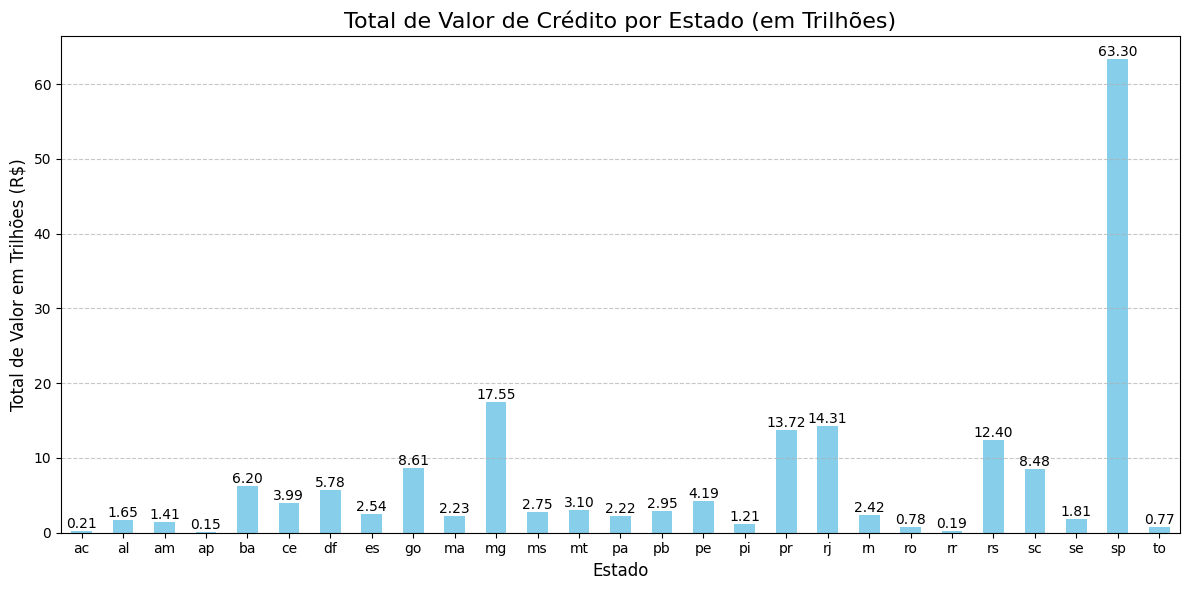

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

# Transformar os valores em trilhões
(df.groupby('estado')['valor'].sum() / 1e12).plot(kind='bar', ax=ax, color='skyblue')

ax.set_title('Total de Valor de Crédito por Estado (em Trilhões)', fontsize=16)
ax.set_xlabel('Estado', fontsize=12)
ax.set_ylabel('Total de Valor em Trilhões (R$)', fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Exibindo o valor em cima das barras em trilhões
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

O intuíto do gráfico acima foi de comparar como cada estado do Brasil tem impacto no crédito imobiliário nacional. Pode-se notar que o estado de São Paulo em disparada é o estado que mais tem impacto no crédito.
O restante dos estados se mantém abaixo de 10 trilhões, com excessão de 4 estados, MG, PR, RJ e RS.

## Tipo de transação por estado

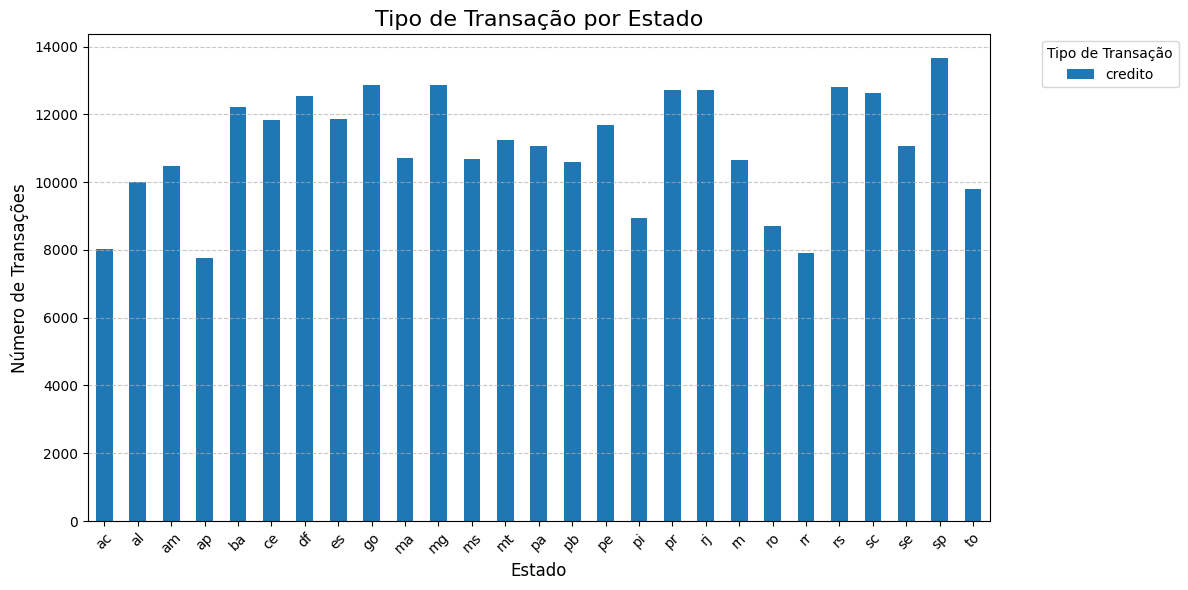

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
df.groupby(['estado', 'tipo_transacao']).size().unstack().plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

ax.set_title('Tipo de Transação por Estado', fontsize=16)
ax.set_xlabel('Estado', fontsize=12)
ax.set_ylabel('Número de Transações', fontsize=12)
ax.legend(title='Tipo de Transação', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Acima podemos ver a quantidade em número de transações de crédito imobiliário por estado. Os valores aqui já são mais equilibrados, porém o estado de São Paulo ainda lidera em números.
Isso significa que em média todos os estados do Brasil tem o número de transações de crédito imobiliário próximos.

## Distribuição de valores de crédito por tipo de cliente (PF vs PJ)

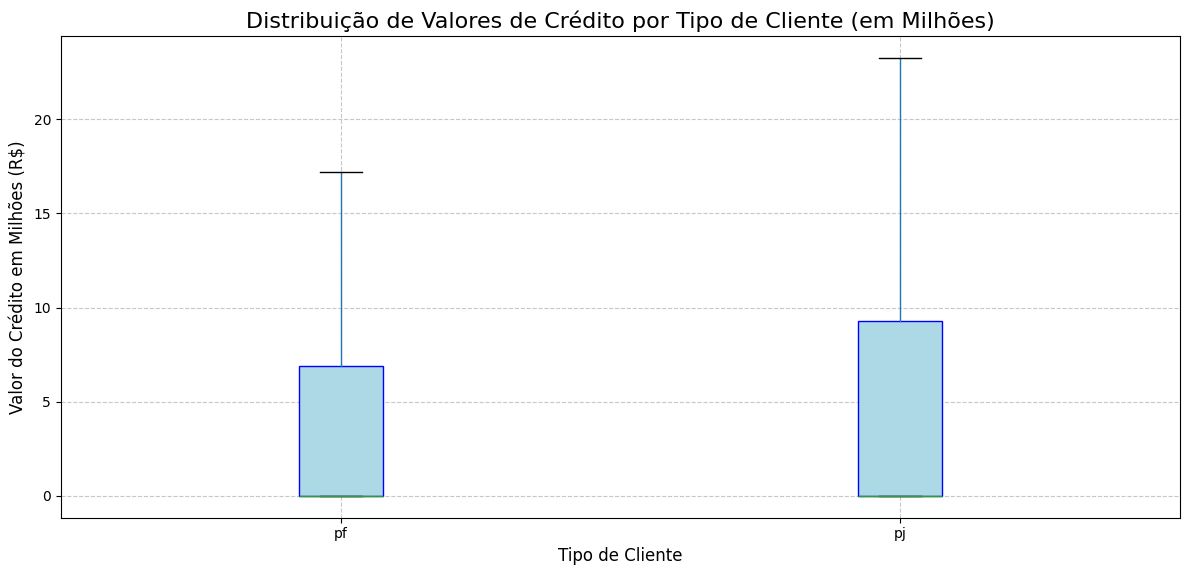

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

# Transformar os valores em milhões
df['valor_milhoes'] = df['valor'] / 1e6

df.boxplot(column='valor_milhoes', by='tipo_cliente', showfliers=False, ax=ax, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='blue'))

ax.set_title('Distribuição de Valores de Crédito por Tipo de Cliente (em Milhões)', fontsize=16)
ax.set_xlabel('Tipo de Cliente', fontsize=12)
ax.set_ylabel('Valor do Crédito em Milhões (R$)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('')
plt.tight_layout()
plt.show()


Acima vemos a divisão classificada por Pessoa Física e Pessoa Jurídica. Nota-se que o valor de crédito para PJ é maior do que para PF. Isso mostra que empresas e comércios possuem maior crédito imobiliário, se comparado com pessoa física.

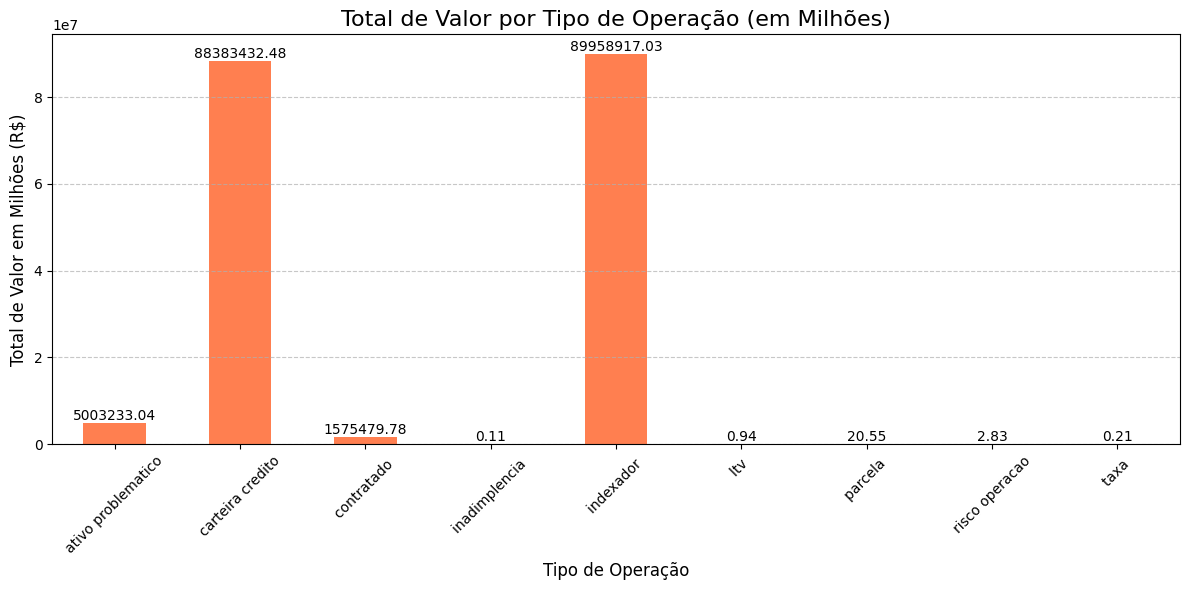

In [9]:
# Correlação entre o valor e o tipo de operação
fig, ax = plt.subplots(figsize=(12, 6))

# Transformar os valores em milhões
df['valor_milhoes'] = df['valor'] / 1e6

df.groupby('tipo_operacao')['valor_milhoes'].sum().plot(kind='bar', ax=ax, color='coral')

ax.set_title('Total de Valor por Tipo de Operação (em Milhões)', fontsize=16)
ax.set_xlabel('Tipo de Operação', fontsize=12)
ax.set_ylabel('Total de Valor em Milhões (R$)', fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Exibe os valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

O gráfico acima mostra o valor total de cada tipo de operação de crédito imobiliário. A carteira de crédito e o indexador são os maiores percentuais de tipos de operação.

## Evolução do crédito ao longo do tempo (gráfico de linha)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_11776\142271380.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['valor_trilhoes'].resample('M').sum().plot(kind='line', ax=ax, color='green')


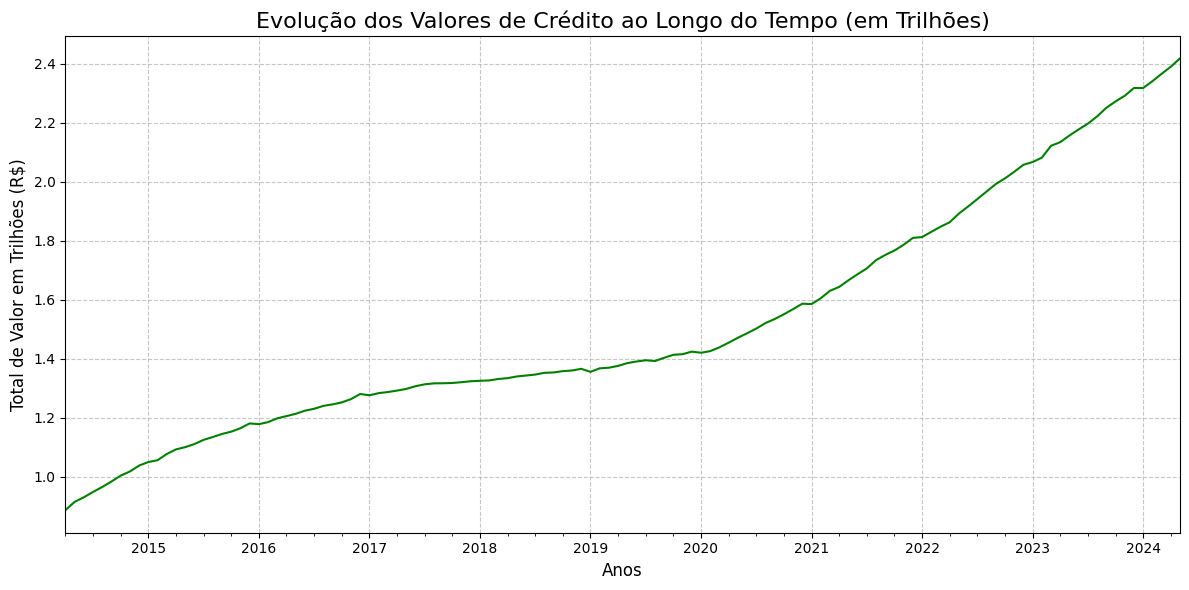

In [12]:
df['data'] = pd.to_datetime(df['data'])

# Transformar os valores em Trilhões
df['valor_trilhoes'] = df['valor'] / 1e12

df = df.set_index('data')

df = df.dropna(subset=['valor_trilhoes'])

# Criar gráfico
fig, ax = plt.subplots(figsize=(12, 6))

df['valor_trilhoes'].resample('M').sum().plot(kind='line', ax=ax, color='green')

# Definir título e rótulos
ax.set_title('Evolução dos Valores de Crédito ao Longo do Tempo (em Trilhões)', fontsize=16)
ax.set_xlabel('Anos', fontsize=12)
ax.set_ylabel('Total de Valor em Trilhões (R$)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Acima vemos que ao passar dos anos o valor de crédito imobiliário cresceu, isso deve-se a diversos fatores como investimentos, inflação, mais pessoas com acesso ao crédito imobiliário e programas do governo para aquisição de imóvel.

## Correlação entre o valor do crédito e o tipo de cliente
#### Gráfico de barras empilhado (PF vs PJ)

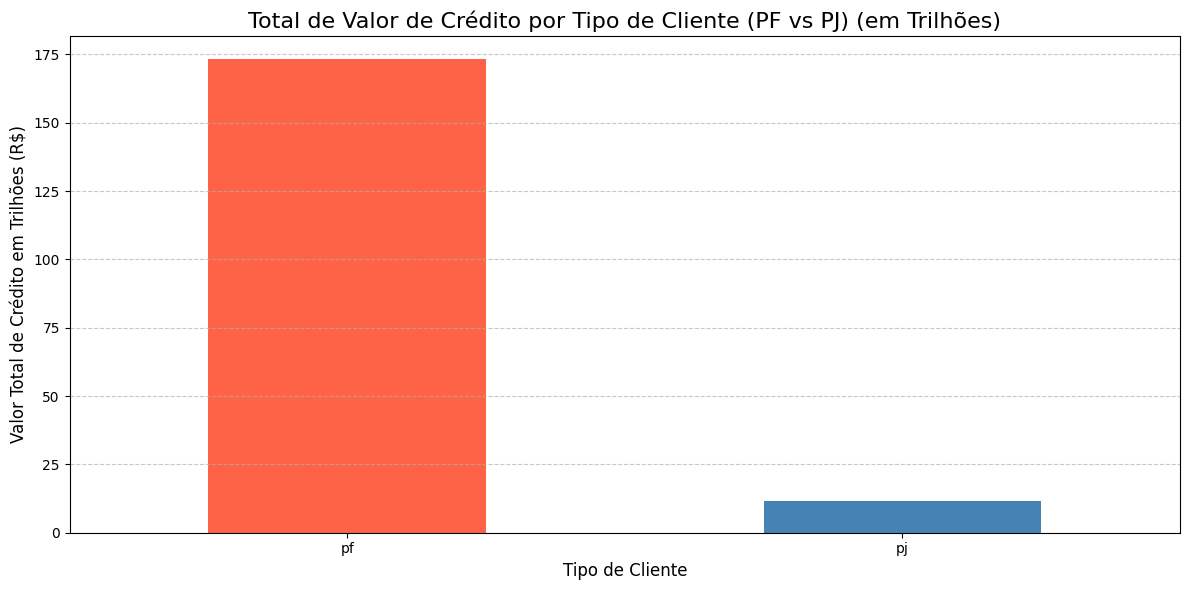

In [17]:
# Transformar os valores em Trilhões
df['valor_trilhoes'] = df['valor'] / 1e12


df.groupby(['tipo_cliente'])['valor_trilhoes'].sum().plot(kind='bar', color=['#FF6347', '#4682B4'], figsize=(12, 6))
plt.title('Total de Valor de Crédito por Tipo de Cliente (PF vs PJ) (em Trilhões)', fontsize=16)
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.ylabel('Valor Total de Crédito em Trilhões (R$)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


Acima ao invés de vermos a distribuição do crédito onde PJ é maior que PF, aqui temos o valor do crédito, onde para PF o valor é muito maior que o de PJ. Isso deve-se a financiamento, e por ter mais pessoas físicas adquirindo créditos maiores do que pessoas jurídicas.

## Distribuição dos valores de crédito por estado

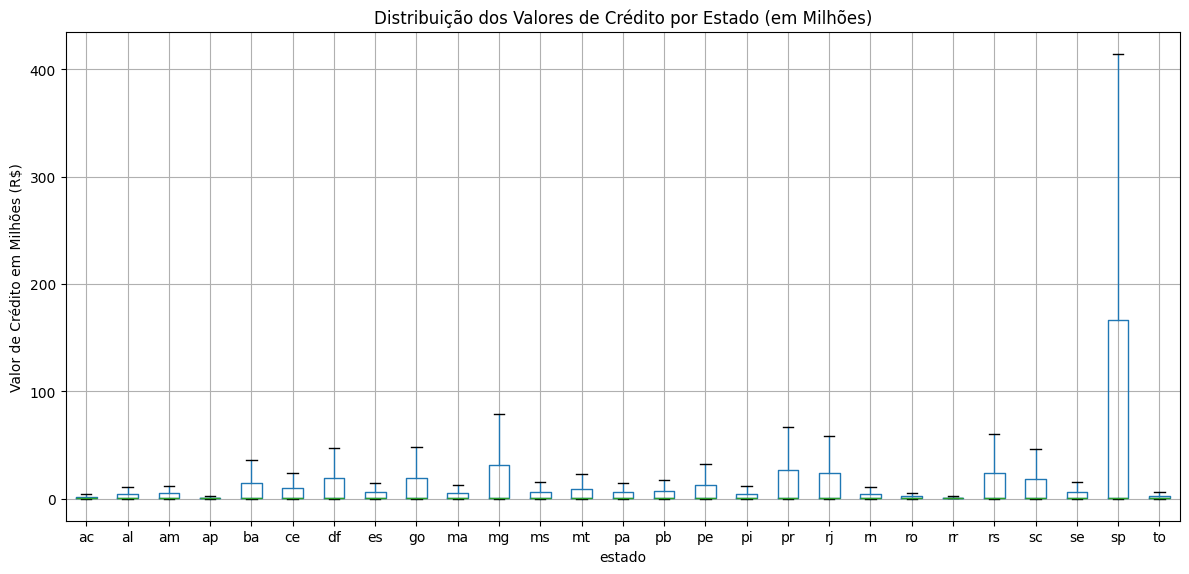

In [18]:
# Transformar os valores em Milhões
df['valor_milhoes'] = df['valor'] / 1e6


df.boxplot(column='valor_milhoes', by='estado', figsize=(12, 6), showfliers=False)
plt.title('Distribuição dos Valores de Crédito por Estado (em Milhões)')
plt.suptitle('')
plt.ylabel('Valor de Crédito em Milhões (R$)')
plt.grid(True)

plt.tight_layout()
plt.show()


Acima vemos a variação do valor de crédito o por cada estado, tendo alguns pontos isolado para alguns estados, porém seguindo o mesmo padrão do gráfico de valor total de crédito por estado.

## Análise do número de transações por tipo de operação

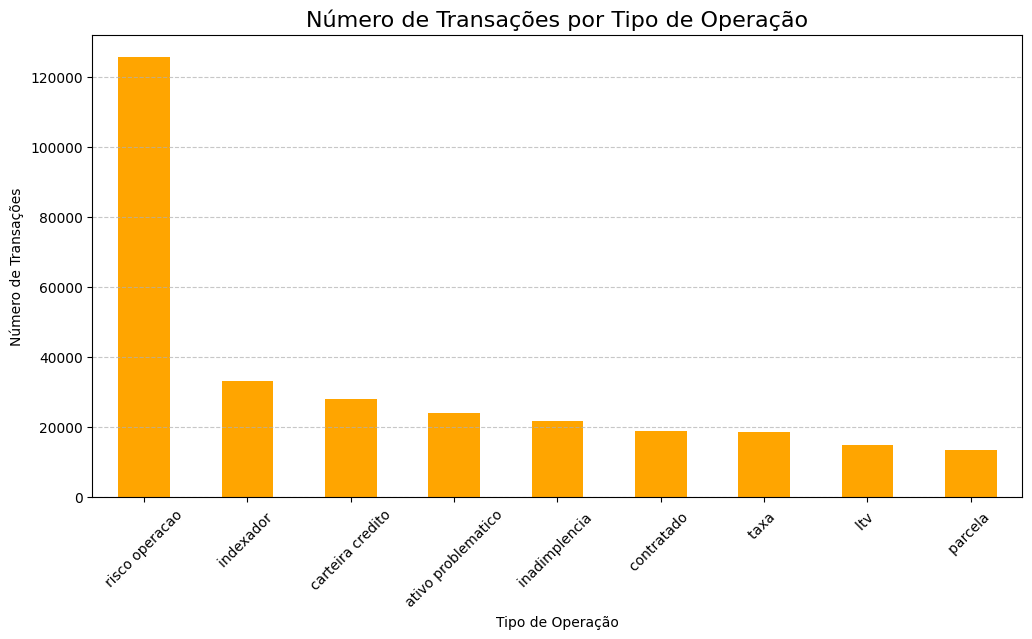

In [19]:
df['tipo_operacao'].value_counts().plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Número de Transações por Tipo de Operação', fontsize=16)
plt.xlabel('Tipo de Operação')
plt.ylabel('Número de Transações')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


Para o número de transações por tipo de operação, vimos que o risco de operação é o que lidera, em seguida vimos que os outros tipos de operação são bem próximos.

## Correlação entre o valor do crédito e a frequência das operações por estado

C:\Users\Vitor\AppData\Local\Temp\ipykernel_11776\793033267.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (df_estado['num_transacoes'][i], df_estado['valor_trilhoes'][i]),


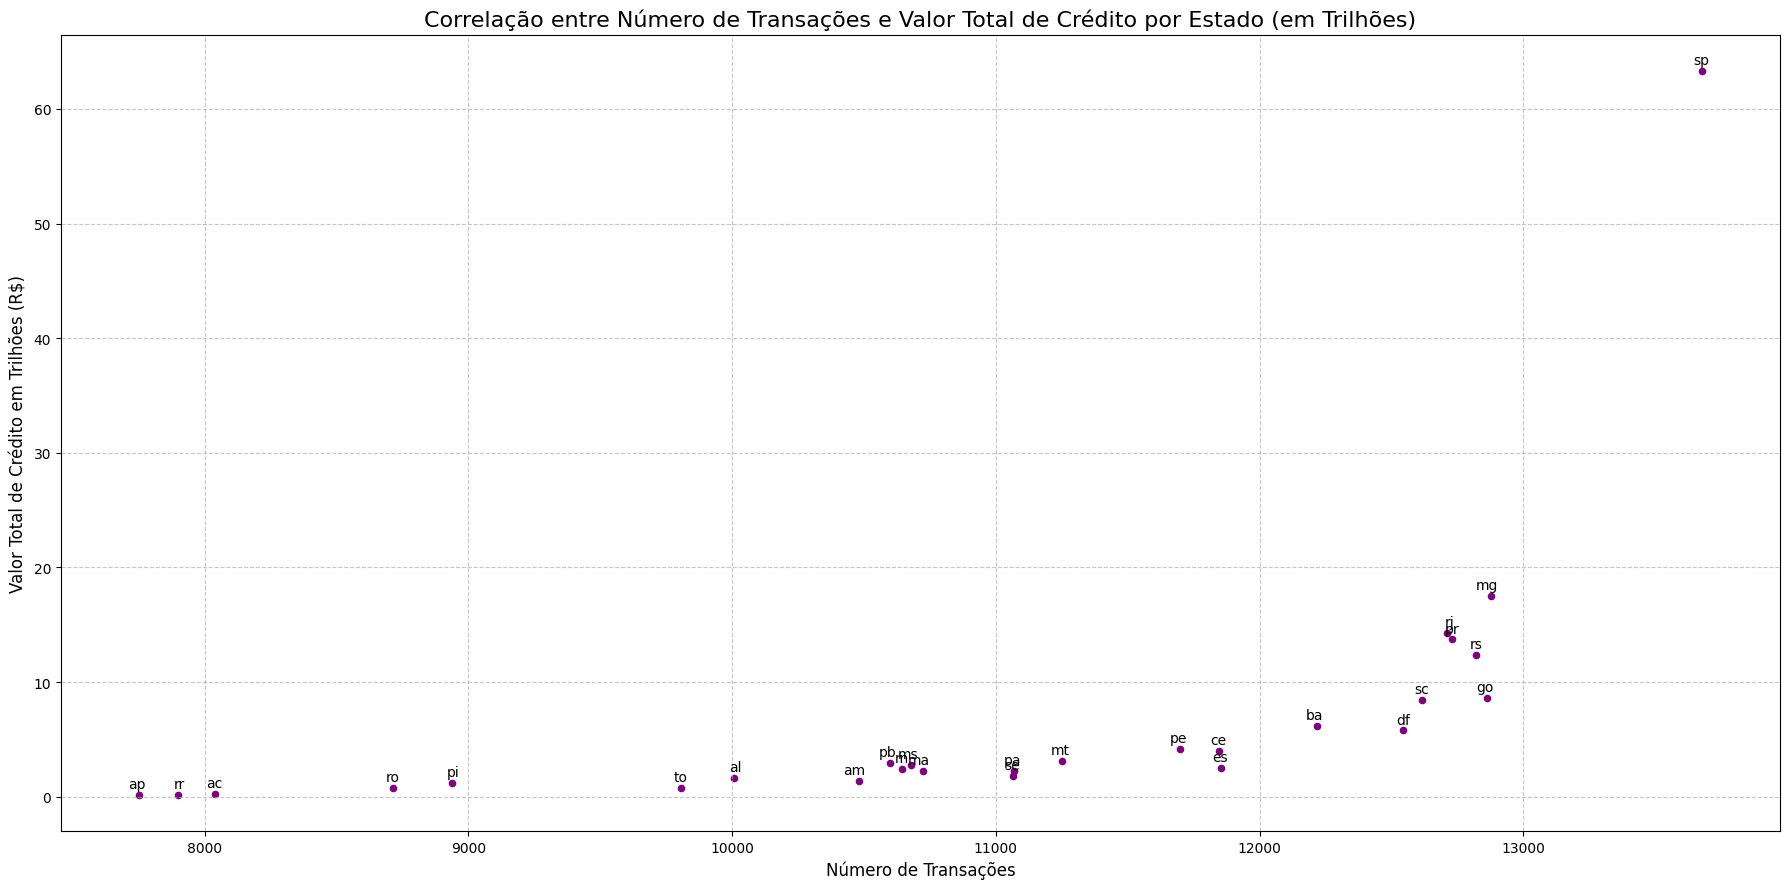

In [20]:
# Transformar os valores em Milhões
df_estado = df.groupby('estado').agg({'valor': 'sum', 'estado': 'count'}).rename(columns={'estado': 'num_transacoes'})
df_estado['valor_trilhoes'] = df_estado['valor'] / 1e12

fig, ax = plt.subplots(figsize=(18, 9))
df_estado.plot(kind='scatter', x='num_transacoes', y='valor_trilhoes', ax=ax, color='purple')

plt.title('Correlação entre Número de Transações e Valor Total de Crédito por Estado (em Trilhões)', fontsize=16)
plt.xlabel('Número de Transações', fontsize=12)
plt.ylabel('Valor Total de Crédito em Trilhões (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

for i, txt in enumerate(df_estado.index):
    ax.annotate(txt, 
                (df_estado['num_transacoes'][i], df_estado['valor_trilhoes'][i]), 
                fontsize=10, ha='right', 
                xytext=(5, 5), textcoords='offset points')  # Deslocamento dos rótulos

plt.tight_layout()
plt.show()